**Exploring the Dataset**

The dataset is from an E-commerce website which sells electronic goods **Electronica**. It has information about each users first transaction on Electronica's website. The website loses money if the transaction is Fraudualent equivalent to the transaction amount, also the website loses money amounting to **8 USD** if it flags a genuine transaction as fraudualent as it hampers the convenience of the customers.

**Importing Libraries and Dependencies**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
# !pip install pandas-profiling

#### **Loading the dataset**

I have used Google Colab as it gives you GPU access and thus faster computation. 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Converting csv to Dataframe**

In [0]:
df = pd.read_csv('drive/My Drive/ATD/fraud.csv')

**Displaying top 5 rows of Dataframe**

In [0]:
df.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,149671,285108,2015-07-15 04:36:55,2015-09-10 14:17:56,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0
1,15611,131009,2015-01-24 12:29:58,2015-04-13 04:53:55,31,XGQAJSOUJIZCC,SEO,IE,F,21,3.251268e+09,0
2,73178,328855,2015-03-11 00:54:12,2015-04-05 12:23:49,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,0
3,84546,229053,2015-01-07 13:19:17,2015-01-09 10:12:06,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0
4,35978,108439,2015-02-08 21:11:04,2015-04-09 14:26:10,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,0


The dataset has 120000 rows i.e 120000 transactions and 12 columns including the class column (target variable). The data is a mix of numeric, categorical and string variables. The class column assigns 0 or 1 values to each transaction which states whether a transaction is **fraud(1) or non-fraud(0)**.

Removing first column as it is unlabelled and does not correlate to anything. 

In [0]:
df = df.drop(['Unnamed: 0'], axis =1)

#### **Checking for null values**

In [0]:
df.isnull().sum().max()

0

Great, so we have no null values. 

In [0]:
df.shape

(120000, 11)

Displaying the dataFrame dimensions. 

**Displaying a short summary of Dataframe**

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         120000 non-null  int64  
 1   signup_time     120000 non-null  object 
 2   purchase_time   120000 non-null  object 
 3   purchase_value  120000 non-null  int64  
 4   device_id       120000 non-null  object 
 5   source          120000 non-null  object 
 6   browser         120000 non-null  object 
 7   sex             120000 non-null  object 
 8   age             120000 non-null  int64  
 9   ip_address      120000 non-null  float64
 10  class           120000 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 10.1+ MB


**Displaying basis statistics for raw Dataframe**

In [0]:
df.describe()

,user_id,purchase_value,age,ip_address,class
count,120000.000000,120000.000000,120000.000000,1.200000e+05,120000.000000
mean,200320.280100,36.881475,33.125250,2.151550e+09,0.093875
std,115361.945935,18.325855,8.617081,1.248314e+09,0.291656
min,2.000000,9.000000,18.000000,9.344714e+04,0.000000
25%,100925.500000,22.000000,27.000000,1.085345e+09,0.000000
50%,200037.500000,34.000000,33.000000,2.155238e+09,0.000000
75%,300395.500000,49.000000,39.000000,3.241268e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [0]:
df.describe(include=np.object)

,signup_time,purchase_time,device_id,source,browser,sex
count,120000,120000,120000,120000,120000,120000
unique,120000,119729,110599,3,5,2
top,2015-04-11 17:09:02,2015-07-17 23:22:55,ITUMJCKWEYNDD,SEO,Chrome,M
freq,1,3,19,48297,48652,70126


**Exploring the data distribution**

In [0]:
def fraud_data_stats():
  frd_cnt = df['class'].value_counts()[1]
  nonfrd_cnt = df['class'].value_counts()[0]
  purchase_value_fraud = df['purchase_value'].loc[df['class'] == 1]
  purchase_value_non_fraud = df['purchase_value'].loc[df['class'] == 0]

  print("\t\t\t\t\t Fraud \t\t\t Non Fraud")

  print('Number of Transactions: \t\t', frd_cnt,'\t\t\t',nonfrd_cnt,'\t\t\t')

  print('Purchase: \t\t\t\t', purchase_value_fraud.sum(),'\t\t',purchase_value_non_fraud.sum(),'\t\t\t')
  
  print('Purchase %: \t\t\t\t',round(frd_cnt/len(df) * 100,2),'\t\t\t',round(nonfrd_cnt/len(df) * 100,2),'\t\t')
  

In [0]:
fraud_data_stats()

					 Fraud 			 Non Fraud
Number of Transactions: 		 11265 			 108735 			
Purchase: 				 417550 		 4008227 			
Purchase %: 				 9.39 			 90.61 		


We see there are 11,265 fraudualent transaction against 108735 non-fraudualent transactions. So this is a highly imbalanced dataset. This is an area of concern, one common thing that happens in this sort of highly skewed dataset is that all the classifying algorithms might memorize too much from the highly prevailing class (90.61% in the dataset) and assume that all transactions are non-fraud. This is an huge issue and causes something called overfitting as Normal transactions overwhelm the fraudulent ones by a large margin.

In [0]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     |████████████████████████████████| 26.8MB 76.2MB/s 
     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 614kB 8.4MB/s 
     |████████████████████████████████| 3.1MB 42.0MB/s 
     |████████████████████████████████| 71kB 11.7MB/s 
     |████████████████████████████████| 296kB 47.4MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=0b15f31ca92d533bf9273d6f38d1ba18e8acfc717a79c7b644d860573db84086
  Stored in directory: /tmp/pip-ephem-wheel-cache-zof87whe/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=98ed385478b329e8370372108d5e235961f0a3867d92ced0fb41807588bec750
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=b1e671b362622c97c

**Using Pandas Profiling**

In [0]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='drive/My Drive/ATD/output.html')

Using Pandas-profiling to do a basic **EDA**. One major advantage of using it is that it generates an interactive report visualizing the distribution of each variable and it shows variables with NAN values, categorical variables and variables containing many zeros.

In [0]:
from IPython.display import HTML
HTML(filename='drive/My Drive/ATD/output.html')

Number of variables,11
Number of observations,120000
Missing cells,0
Missing cells (%),0.0%
Duplicate rows,0
Duplicate rows (%),0.0%
Total size in memory,10.1 MiB
Average record size in memory,88.0 B
CAT,6
NUM,4
BOOL,1


**Visualizing Class Distribution**

Text(0.5, 1.0, 'Class Distributions \n (0: Non Fraud | 1: Fraud)')

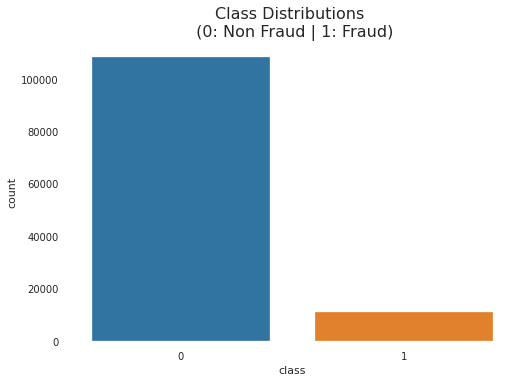

In [0]:
sns.countplot('class', data=df)
plt.title('Class Distributions \n (0: Non Fraud | 1: Fraud)', fontsize=16)

##VISUALIZING FEATURES

**Visualizing Distribution of Transaction amount on the basis of Classes**

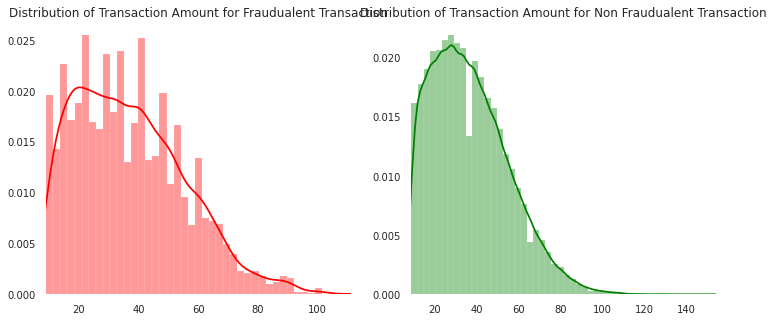

In [0]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

val_fraud = df['purchase_value'].loc[df['class'] == 1].values
val_nonfraud = df['purchase_value'].loc[df['class'] == 0].values

sns.distplot(val_fraud, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount for Fraudualent Transaction', fontsize=12)
ax[0].set_xlim([min(val_fraud), max(val_fraud)])

sns.distplot(val_nonfraud, ax=ax[1], color='g')
ax[1].set_title('Distribution of Transaction Amount for Non Fraudualent Transaction', fontsize=12)
ax[1].set_xlim([min(val_nonfraud), max(val_nonfraud)])

plt.show()

**Visualizing Distribution of Browsers used on the basis of Classes**

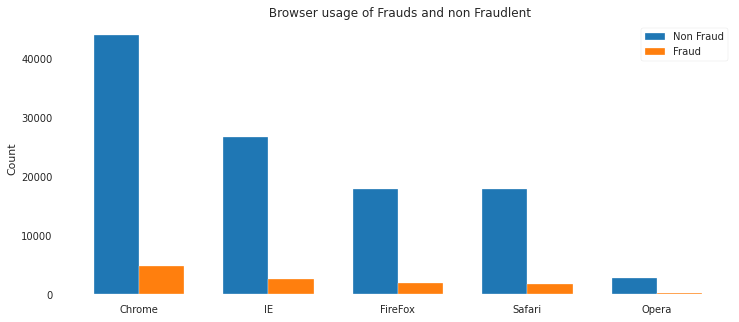

In [0]:
fig, ax = plt.subplots(1,1,figsize=(12,5))

browser_fraud = df['browser'].loc[df['class'] == 1].value_counts()
browser_nonfraud = df['browser'].loc[df['class'] == 0].value_counts()


list_of_browser = list(browser_fraud.to_frame().index)
ind = np.arange(len(list_of_browser))
width = 0.35       
plt.bar(ind , browser_nonfraud, width,
    label='Non Fraud')
plt.bar(ind + width, browser_fraud, width, label='Fraud')

plt.ylabel('Count')
plt.legend(loc="upper right")
plt.title(' Browser usage of Frauds and non Fraudlent')
plt.xticks(ind + width / 2,list_of_browser) 

plt.show()

**Visualizing Distribution of Sources used on the basis of Classes**

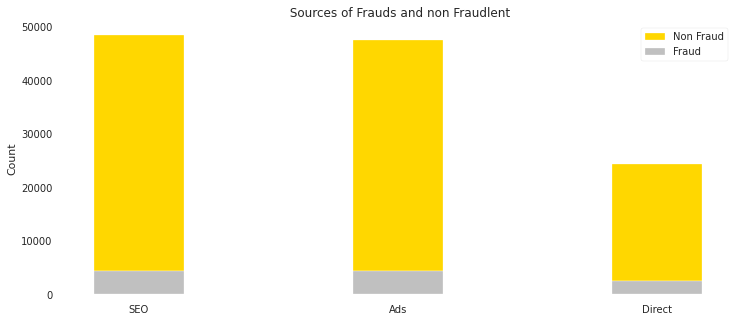

In [0]:
fig, ax = plt.subplots(1,1,figsize=(12,5))

source_fraud = df['source'].loc[df['class'] == 1].value_counts()
source_nonfraud = df['source'].loc[df['class'] == 0].value_counts()

list_of_source = list(source_fraud.to_frame().index)
width = 0.35       
ind = [x for x, _ in enumerate(list_of_source)]
plt.bar(ind , source_nonfraud, width,
    label='Non Fraud', color='gold', bottom = source_fraud)
plt.bar(ind, source_fraud, width, color='silver', label='Fraud')

plt.ylabel('Count')
plt.legend(loc="upper right")
plt.title(' Sources of Frauds and non Fraudlent')
plt.xticks(ind,list_of_source) 

plt.show()

**Analysing the device id for Fraudualent transactions**

In [0]:
source_fraud = df['device_id'].loc[df['class'] == 1].value_counts()

In [0]:
source_fraud.head(10)

ITUMJCKWEYNDD    18
EQYVNEGOFLAWK    17
KIPFSCNUGOLDP    16
CDFXVYHOIHPYP    16
ZUSVMDEZRBDTX    16
SUEKLSZWLASFR    15
SDJQRPKXQFBED    15
IXNWEKWJGNLNH    15
IGKYVZDBEGALB    15
NKIHDDUCTWEVS    14
Name: device_id, dtype: int64

One thing that needs to be noted is that for a major part of the fraud transactions the device_id has been repeated. So multiple transactins from a single device is an unusual behavior in this dataset. Since the data just has the first transaction for every user created, so if the same device_id is repeated for multiple user_ids then it can flagged as threatning activity. 

##Feature Engineering

**IP Address to Country Mapping**

Storing ip_adddress in a Dataframe for reference. 

In [0]:
iparray = df.ip_address.values

**Installing 'pygeoip' library**

In [0]:
!pip install pygeoip

In [0]:
!sudo apt-get install libgeoip-dev # Installs GeoIP.dat

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  geoip-bin geoip-database libgeoip1
The following NEW packages will be installed:
  geoip-bin geoip-database libgeoip-dev libgeoip1
0 upgraded, 4 newly installed, 0 to remove and 29 not upgraded.
Need to get 2,286 kB of archives.
After this operation, 7,770 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 geoip-database all 20180315-1 [2,090 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgeoip1 amd64 1.6.12-1 [71.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 geoip-bin amd64 1.6.12-1 [46.5 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgeoip-dev amd64 1.6.12-1 [77.2 kB]
Fetched 2,286 kB in 1s (2,418 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot 

"Pygeoip" basically helps in mapping the ip_address to the specific country it comes from. Pygeoip uses the **GEOIP API** database which holds all the ips.

In [0]:
from random import randint
import ipaddress as ip
import pygeoip

In [0]:
gi = pygeoip.GeoIP('/usr/share/GeoIP/GeoIP.dat',
                   flags=pygeoip.const.MMAP_CACHE)

In [0]:
def CountryCodeByAddr():
  country = []
  for i in range(0, len(df)):
      c = gi.country_code_by_addr(str(ip.IPv4Address(int(iparray[i]))))
      if c == '':
          country.append('Private') ###For blank ips
      else:
          country.append(c)
  return country

In [0]:
country = CountryCodeByAddr()

**Adding Country Column to DataFrame**

In [0]:
df.insert(loc=10, column='Country', value=country)

In [0]:
df.head()

,user_id,Timegap,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,Country,class
0,285108,4959661.0,2015-07-15 04:36:55,2015-09-10 14:17:56,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,US,0
1,131009,6798237.0,2015-01-24 12:29:58,2015-04-13 04:53:55,31,XGQAJSOUJIZCC,SEO,IE,F,21,3.251268e+09,GB,0
2,328855,2201377.0,2015-03-11 00:54:12,2015-04-05 12:23:49,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,US,0
3,229053,161569.0,2015-01-07 13:19:17,2015-01-09 10:12:06,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,KR,0
4,108439,5159706.0,2015-02-08 21:11:04,2015-04-09 14:26:10,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,BR,0


This shows that now every transaction has a country column. So now we know from which country the transaction was made for each of the 120000 transactions.

**Analysing the time difference between user Profile creation and Purchase order**

Converting time columns to pandas datetime format for calculation and programming ease.

In [0]:
pt = pd.to_datetime(df['purchase_time'])
st = pd.to_datetime(df['signup_time'])
timegap = pt - st
gap_in_second = timegap/np.timedelta64(1,'s')
df.insert(loc=1, column='Timegap', value=list(gap_in_second))

We are basically adding a new datapoint as time gap which is nothing but the time difference between signup and purchase. So that we get to know how long after their profile creation the users have made their first purchase.  

In [0]:
a = []
b = []
power = 0
for i in range(1,5):
    a.append((gap_in_second <=(1*10**(power))).value_counts()[0])
    b.append((gap_in_second <=(1*10**(power))).value_counts()[1])
    power = 2*i + 1
    

Dividing the time gap into 4 different durations. 

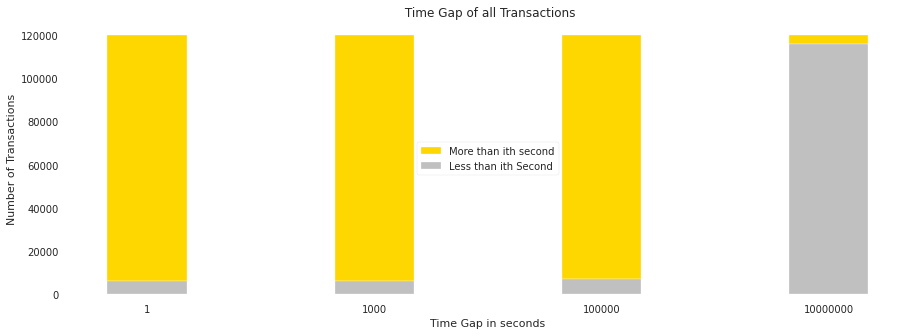

In [0]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

width = 0.35
ind = [x for x, _ in enumerate(a)]
plt.bar(ind , a, width,label='More than ith second', color='gold', bottom = b)
plt.bar(ind, b, width, color='silver', label='Less than ith Second')
timelist = [1,1000, 100000, 10000000]
plt.ylabel('Number of Transactions')
plt.xlabel('Time Gap in seconds')
plt.legend(loc="center")
plt.title(' Time Gap of all Transactions')
plt.xticks(ind,timelist) 

plt.show()

In [0]:
print("Purchases done in less than or equal to 1 second from signup: ",(gap_in_second <=(1)).value_counts()[0])
print("Purchases done in more than 1 second from signup: ",(gap_in_second <=(1)).value_counts()[1])

Purchases done in less than or equal to 1 second from signup:  113979
Purchases done in more than 1 second from signup:  6021


In [0]:
tg_1 = df['Timegap'].loc[df['class'] == 1].values
tg1 = len(tg_1[tg_1 <= 1])
tg2 = len(list(tg_1[np.array(tg_1 > 1) & np.array(tg_1 <= 10)]))
tg3 = len(list(tg_1[np.array(tg_1 > 10) & np.array(tg_1<=1000)]))
tg4 = len(list(tg_1[np.array(tg_1 >1000) & np.array(tg_1<=100000)]))
tg5 = len(tg_1[tg_1 > 100000])

In [0]:
#tg1,tg2,tg3,tg4,tg5

print('Fraudualent transaction done in less than or equal to 1 second from signup: ',tg1)
print('Fraudualent transaction done in more than 100000 second from signup: ',tg5)

Fraudualent transaction done in less than or equal to 1 second from signup:  6021
Fraudualent transaction done in more than 100000 second from signup:  5199


One unique observation is that all the purchases made within one second of signup are fraud transactions and more that 60% of all fraudualent transaction happen within one second from sign up.

My guess is that automated bots or automated scripts are used to scam. Thus it seems that the ML model could make use of this feature to classify the transaction. Adding timegap feature to dataframe is thus a good idea. 

**Displaying the number of Fraudualent transactions from each country**

In [0]:
country_count_fraud = df['Country'].loc[df['class'] == 1].value_counts()

In [0]:
country_count_fraud = country_count_fraud.head(30)

In [0]:
country_count_fraud.to_frame()

,Country
US,4478
Private,1455
CN,826
JP,559
GB,375
KR,307
FR,243
BR,226
DE,214
CA,207


**Visualizing purchase amout on the basis of timegap**

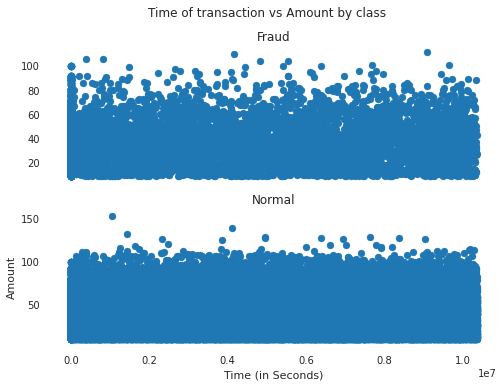

In [0]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
df_fraud = df[df['class'] == 1]
ax1.scatter(list(df_fraud['Timegap']),list(df_fraud['purchase_value']))
ax1.set_title('Fraud')

ax2.scatter(list(df['Timegap']),list(df['purchase_value']))
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

It's a cluttered graph and does not make any sense. 

In [0]:
  df.head()

,user_id,Timegap,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,Country,class
0,285108,4959661.0,2015-07-15 04:36:55,2015-09-10 14:17:56,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,US,0
1,131009,6798237.0,2015-01-24 12:29:58,2015-04-13 04:53:55,31,XGQAJSOUJIZCC,SEO,IE,F,21,3.251268e+09,GB,0
2,328855,2201377.0,2015-03-11 00:54:12,2015-04-05 12:23:49,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,US,0
3,229053,161569.0,2015-01-07 13:19:17,2015-01-09 10:12:06,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,KR,0
4,108439,5159706.0,2015-02-08 21:11:04,2015-04-09 14:26:10,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,BR,0


In [0]:
df_new = df.copy(deep=True)

**Checking the number of categories for browsers**

In [0]:
df_new['browser'].unique()

array(['Chrome', 'IE', 'FireFox', 'Safari', 'Opera'], dtype=object)

So there are 5 different browser types.

**Dropping redundant columns**

In [0]:
df_new = df_new.drop(['signup_time','purchase_time','user_id','ip_address'], axis=1)

In [0]:
df_new

,Timegap,purchase_value,device_id,source,browser,sex,age,Country,class
0,4959661.0,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,US,0
1,6798237.0,31,XGQAJSOUJIZCC,SEO,IE,F,21,GB,0
2,2201377.0,16,VCCTAYDCWKZIY,Direct,IE,M,26,US,0
3,161569.0,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,KR,0
4,5159706.0,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,BR,0
...,...,...,...,...,...,...,...,...,...
119995,4273562.0,46,UJYRDGZXTFFJG,Ads,Chrome,M,18,NL,0
119996,2034935.0,26,EMMTCPTUYQYPX,Ads,IE,F,36,CN,0
119997,3424852.0,41,YSZGGEARGETEU,SEO,Chrome,M,31,US,0
119998,6982807.0,50,BJDWRJULJZNOV,SEO,Chrome,F,43,CH,0


In [0]:
df_new1 = df_new.copy(deep= True)

In [0]:
df_new1 = df_new1.drop(['device_id','Country'], axis=1)

In [0]:
df_new1

,Timegap,purchase_value,source,browser,sex,age,class
0,4959661.0,31,Direct,Chrome,M,49,0
1,6798237.0,31,SEO,IE,F,21,0
2,2201377.0,16,Direct,IE,M,26,0
3,161569.0,29,SEO,Chrome,M,34,0
4,5159706.0,26,Ads,FireFox,M,33,0
...,...,...,...,...,...,...,...
119995,4273562.0,46,Ads,Chrome,M,18,0
119996,2034935.0,26,Ads,IE,F,36,0
119997,3424852.0,41,SEO,Chrome,M,31,0
119998,6982807.0,50,SEO,Chrome,F,43,0


**Encoding the browser and source column**

In [0]:
import pandas as pd
import numpy as np
bridge_df = pd.get_dummies(df_new1['browser'])
source_df = pd.get_dummies(df_new1['source'])

In [0]:
df_new1 = pd.concat([df_new1,bridge_df,source_df],axis = 1)

In [0]:
df_new1 = df_new1.drop(['browser','source'],axis = 1)

**One Hot Encoding**

In [0]:
df_new1

,Timegap,purchase_value,sex,age,class,Chrome,FireFox,IE,Opera,Safari,Ads,Direct,SEO
0,4959661.0,31,M,49,0,1,0,0,0,0,0,1,0
1,6798237.0,31,F,21,0,0,0,1,0,0,0,0,1
2,2201377.0,16,M,26,0,0,0,1,0,0,0,1,0
3,161569.0,29,M,34,0,1,0,0,0,0,0,0,1
4,5159706.0,26,M,33,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,4273562.0,46,M,18,0,1,0,0,0,0,1,0,0
119996,2034935.0,26,F,36,0,0,0,1,0,0,1,0,0
119997,3424852.0,41,M,31,0,1,0,0,0,0,0,0,1
119998,6982807.0,50,F,43,0,1,0,0,0,0,0,0,1


One hot encoding refers to splitting the column which contains numerical categorical data to many columns depending on the number of categories present in that column. Each column contains “0” or “1” corresponding to which column it has been placed.

**Label encoding the "sex" column**

In [0]:
from sklearn.preprocessing import LabelEncoder

# creating initial dataframe
df_new1['sex'] = LabelEncoder().fit_transform(df['sex'])

In [0]:
df_new1

,Timegap,purchase_value,sex,age,class,Chrome,FireFox,IE,Opera,Safari,Ads,Direct,SEO
0,4959661.0,31,1,49,0,1,0,0,0,0,0,1,0
1,6798237.0,31,0,21,0,0,0,1,0,0,0,0,1
2,2201377.0,16,1,26,0,0,0,1,0,0,0,1,0
3,161569.0,29,1,34,0,1,0,0,0,0,0,0,1
4,5159706.0,26,1,33,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,4273562.0,46,1,18,0,1,0,0,0,0,1,0,0
119996,2034935.0,26,0,36,0,0,0,1,0,0,1,0,0
119997,3424852.0,41,1,31,0,1,0,0,0,0,0,0,1
119998,6982807.0,50,0,43,0,1,0,0,0,0,0,0,1


Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

**Correlation Matrix**

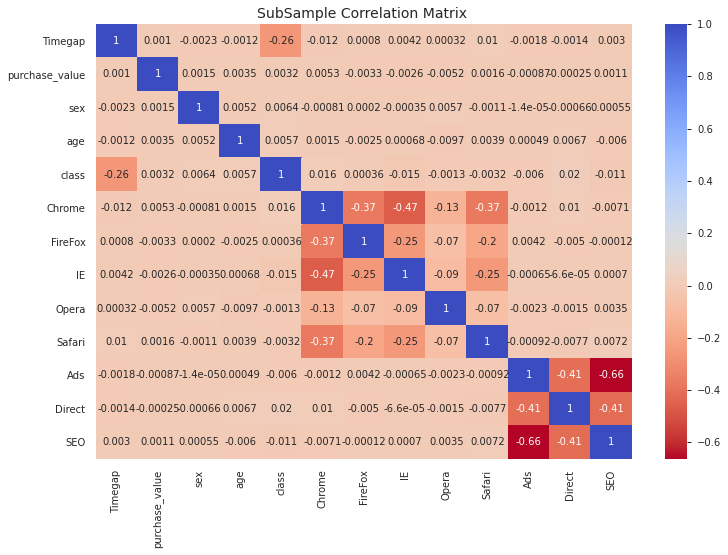

In [0]:
f, ax = plt.subplots(1, figsize=(12,8))
sub_sample_corr = df_new1.corr()
sns.heatmap(sub_sample_corr,annot=True, cmap='coolwarm_r', annot_kws={'size':10})
ax.set_title('SubSample Correlation Matrix ', fontsize=14)
plt.show()

A correlation matrix is a table showing correlation coefficients between sets of variables.

**Predictive Power Score**

Installing dependencies

In [0]:
!pip install ppscore

  Created wheel for ppscore: filename=ppscore-0.0.2-py2.py3-none-any.whl size=9629 sha256=16d62bf2e4de9cabf5b497426f915f5d1e92b7c6cf2a15fd0575777324473958
  Stored in directory: /root/.cache/pip/wheels/29/32/a2/82782fc09f5cd68e401ff047201d38af8965fb94984db18aa5
Successfully built ppscore


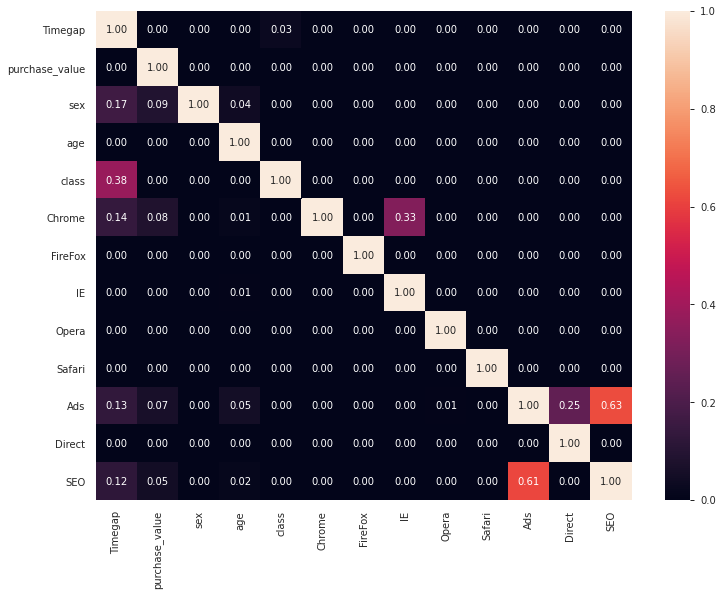

In [0]:
import ppscore as pps
plt.figure(figsize=(12,9))
sns.heatmap(pps.matrix(df_new1),annot=True,fmt=".2f")

There are multiple ways how you can calculate the PPS. The ppscore package provides a sample implementation that is based on the following calculations:

1. The score is calculated using only 1 feature trying to predict the target column. This means there are no interaction effects between the scores of various features. Note that this is in contrast to feature importance.

2. The score is calculated on the test sets of a 4-fold crossvalidation (number is adjustable via ppscore.CV_ITERATIONS)

3. All rows which have a missing value in the feature or the target column are dropped

4. In case that the dataset has more than 5,000 rows the score is only calculated on a random subset of 5,000 rows with a fixed random seed (ppscore.RANDOM_SEED). You can adjust the number of rows or skip this sampling via the API. However, in most scenarios the results will be very similar.

**Creating dataset by removing the class column**

In [0]:
X = df_new1.drop('class', axis=1)
y = df_new1['class']

**Splitting and preparing dataset**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)




Logisitic Regression has a training score of 50.0 % accuracy score


Random Forest Classifier has a training score of 97.0 % accuracy score


The data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset

**Cross-val Score**

Cross_val_score estimates the expected accuracy of your model on out-of-training data (pulled from the same underlying process as the training data, of course). The benefit is that one need not set aside any data to obtain this metric, and you can still train your model on all of the available data.

**K-Fold Cross Validation** 

In K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.


In KFolds, each test set should not overlap, even with shuffle. With KFolds and shuffle, the data is shuffled once at the start, and then divided into the number of desired splits. The test data is always one of the splits, the train data is the rest.

In ShuffleSplit, the data is shuffled every time, and then split. This means the test sets may overlap between the splits.

##**Over-Sampling (SMOTE)**

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [0]:
sm = SMOTE(ratio='minority', random_state=42)
X_train, y_train = sm.fit_sample(X_train, y_train)

Thus solving the class imbalance problem

**Logistic Regression and Random Forest**

In [0]:
###Algorithms

print('\n')
# Logistic Regression
logistic = linear_model.LogisticRegression().fit(X_train,y_train)
training_score = cross_val_score(logistic, X_train, y_train, cv=5)
print("Logisitic Regression has a training accuracy score of", round(training_score.mean(), 2) * 100,"%")

#Random Forest
print('\n')
RFclassifier = RandomForestClassifier().fit(X_train,y_train)
training_score = cross_val_score(RFclassifier, X_train, y_train, cv=5)
print("Random Forest Classifier has a training accuracy score of", round(training_score.mean(), 2) * 100, "%")



Logisitic Regression has a training accuracy score of 50.0 %


Random Forest Classifier has a training accuracy score of 97.0 %


**Classification report**

A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report as shown below

In [0]:
from sklearn.metrics import classification_report
labels = ['No Fraud', 'Fraud']
lr_prediction = logistic.predict(X_test)
print(classification_report(y_test,lr_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       0.91      1.00      0.95     21774
       Fraud       0.00      0.00      0.00      2226

    accuracy                           0.91     24000
   macro avg       0.45      0.50      0.48     24000
weighted avg       0.82      0.91      0.86     24000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**AOC CURVE**

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between transactions that are fraud and transactions that are not.

In [0]:
from sklearn.metrics import roc_auc_score
def aoc_curve(l_model):
  probs = l_model.predict_proba(X_test)
  # keep probabilities for the positive outcome only
  probs = probs[:, 1]
  # calculate AUC
  auc = roc_auc_score(y_test, probs)
  print('AUC: %.3f' % auc)
  # calculate roc curve
  fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)
  # plot no skill
  plt.plot([0, 1], [0, 1], linestyle='--')
  # plot the roc curve for the model
  plt.plot(fpr, tpr, marker='.')
  # show the plot
  plt.show()

AUC: 0.763


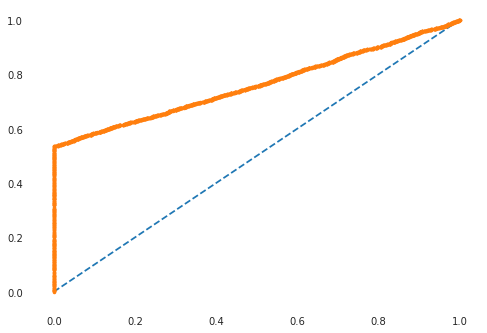

In [0]:
aoc_curve(logistic)

AUC: 0.768


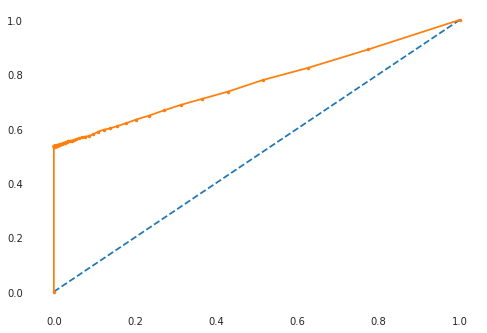

In [0]:
aoc_curve(RFclassifier)

In [0]:
from sklearn.metrics import classification_report
labels = ['No Fraud', 'Fraud']
rf_prediction = RFclassifier.predict(X_test)
print(classification_report(y_test,rf_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       0.95      1.00      0.98     21774
       Fraud       0.97      0.54      0.69      2226

    accuracy                           0.96     24000
   macro avg       0.96      0.77      0.83     24000
weighted avg       0.96      0.96      0.95     24000



In [0]:
from sklearn import metrics
metrics.f1_score(y_test, lr_prediction, average='weighted', labels=np.unique(lr_prediction))

0.9513697732337136

In [0]:
from sklearn import metrics
metrics.f1_score(y_test, rf_prediction, average='weighted', labels=np.unique(rf_prediction))

0.9492232601464078

In [0]:
log_reg_cf = metrics.confusion_matrix(y_test, lr_prediction)
log_reg_cf

array([[21774,     0],
       [ 2226,     0]])

In [0]:
y_score = logistic.decision_function(X_test)

In [0]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.62


**Gradient Boosting Classifier**

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

print('Accuracy Score: ',metrics.
accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred, target_names=labels))

Accuracy Score:  0.9568333333333333
              precision    recall  f1-score   support

    No Fraud       0.95      1.00      0.98     21774
       Fraud       1.00      0.53      0.70      2226

    accuracy                           0.96     24000
   macro avg       0.98      0.77      0.84     24000
weighted avg       0.96      0.96      0.95     24000



AUC: 0.771


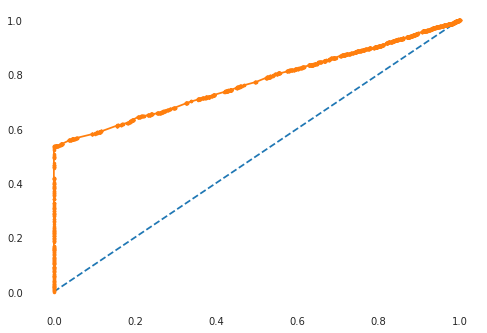

In [0]:
aoc_curve(gb)

**AdaBoost Classifier**

In [0]:
from sklearn import ensemble
adaboost = ensemble.AdaBoostClassifier()

adaboost.fit(X_train, y_train)
from sklearn import ensemble
adaboost_pred = adaboost.predict(X_test)

print('Accuracy Score: ',metrics.accuracy_score(y_test, adaboost_pred))
print(classification_report(y_test, adaboost_pred, target_names=labels))

Accuracy Score:  0.9568333333333333
              precision    recall  f1-score   support

    No Fraud       0.95      1.00      0.98     21774
       Fraud       1.00      0.53      0.70      2226

    accuracy                           0.96     24000
   macro avg       0.98      0.77      0.84     24000
weighted avg       0.96      0.96      0.95     24000



AUC: 0.778


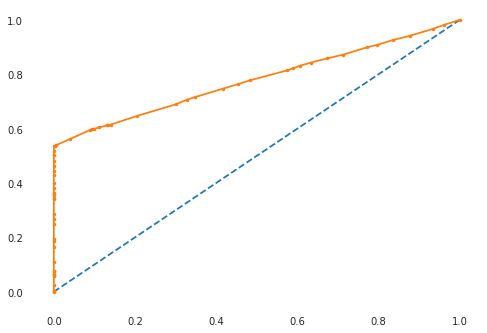

In [0]:
aoc_curve(adaboost)

In [0]:
adaboost_cf = metrics.confusion_matrix(y_test, adaboost_pred)

In [0]:
def plots_sub(cf_matrix):
    fig, axs = plt.subplots(1,1,figsize = (5,5))
    
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    
    labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    bottom, top = axs.get_ylim()
    axs.set_ylim(bottom + 0.5, top - 0.5)

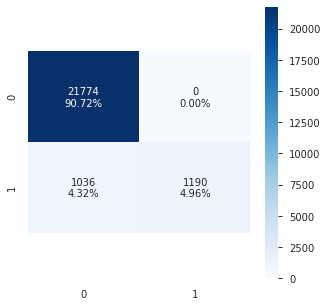

In [0]:
plots_sub(adaboost_cf)

**XGBoost**

In [0]:
import xgboost as xgb
xgboost = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
xgboost.fit(X_train, y_train)
xgboost_pred = xgboost.predict(X_test,validate_features= False)

print('Accuracy Score: ',metrics.accuracy_score(y_test, xgboost_pred))
print()
print(classification_report(y_test, xgboost_pred, target_names=labels))


Accuracy Score:  0.9568333333333333

              precision    recall  f1-score   support

    No Fraud       0.95      1.00      0.98     21774
       Fraud       1.00      0.53      0.70      2226

    accuracy                           0.96     24000
   macro avg       0.98      0.77      0.84     24000
weighted avg       0.96      0.96      0.95     24000



AUC: 0.773


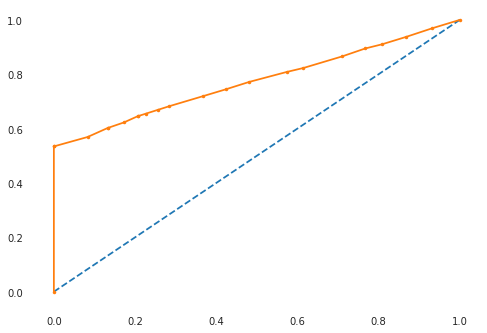

In [0]:
probs = xgboost.predict_proba(X_test,validate_features = False)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [0]:
xgboost_cf = metrics.confusion_matrix(y_test, xgboost_pred)

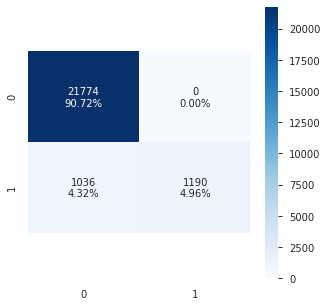

In [0]:
plots_sub(xgboost_cf)

In [0]:
metrics.recall_score(y_test, xgboost_pred)

0.5345911949685535

**Decision Trees**

In [0]:
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
dec_tree = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
dec_tree.fit(X_train, y_train)
dec_tree.score(X_test,y_test)
dec_pred = dec_tree.predict(X_test)
print('Accuracy Score: ',metrics.accuracy_score(y_test, dec_pred))
print()
print(classification_report(y_test, dec_pred, target_names=labels))

Accuracy Score:  0.952

              precision    recall  f1-score   support

    No Fraud       0.95      0.99      0.97     21774
       Fraud       0.91      0.54      0.68      2226

    accuracy                           0.95     24000
   macro avg       0.93      0.77      0.82     24000
weighted avg       0.95      0.95      0.95     24000



AUC: 0.772


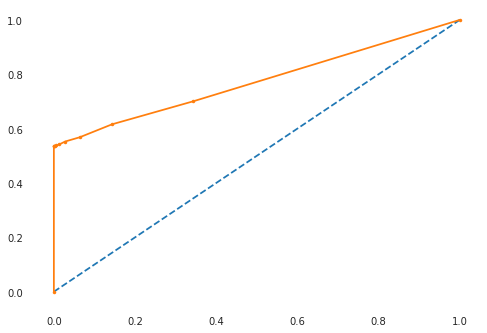

In [0]:
aoc_curve(dec_tree)

In [0]:
decision_tree_cf = metrics.confusion_matrix(y_test, dec_pred)

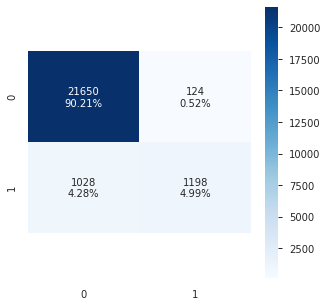

In [0]:
plots_sub(decision_tree_cf)

**PystackNet**

PyStacknet uses Stacknet to predict the model. The inspiration for Stacknet is something called stacking which is nothing but a meta modelling technique. 

It splits the training set into two disjoint sets, then it traines several base learners on the first part and makes predictions with base learners on the second part. Using predictions from make predictions as input and the correct response as output it trains a higher level learner. 

In [0]:
!git clone https://github.com/h2oai/pystacknet


Cloning into 'pystacknet'...
remote: Enumerating objects: 42, done.
remote: Total 42 (delta 0), reused 0 (delta 0), pack-reused 42
Unpacking objects: 100% (42/42), done.


PystackNet

In [0]:
!cd pystacknet

In [0]:
pwd

'/content'

In [0]:
cd pystacknet

/content/pystacknet


In [0]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating pystacknet.egg-info
writing pystacknet.egg-info/PKG-INFO
writing dependency_links to pystacknet.egg-info/dependency_links.txt
writing requirements to pystacknet.egg-info/requires.txt
writing top-level names to pystacknet.egg-info/top_level.txt
writing manifest file 'pystacknet.egg-info/SOURCES.txt'
writing manifest file 'pystacknet.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/pystacknet
copying pystacknet/__init__.py -> build/lib/pystacknet
copying pystacknet/pystacknet.py -> build/lib/pystacknet
copying pystacknet/metrics.py -> build/lib/pystacknet
creating build/lib/pystacknet/test
copying pystacknet/test/__init__.py -> build/lib/pystacknet/test
copying pystacknet/test/test_pystacknet.py -> build/lib/pystacknet/test
copying pystacknet/test/test_amazon.py -> build/lib/pystacknet/test
creating build/bdist.

In [0]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor, GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.decomposition import PCA
models = [ 
            [RandomForestClassifier (n_estimators=100, criterion="entropy", max_depth=10, max_features=0.9, random_state=1),
             ExtraTreesRegressor (n_estimators=100, max_depth=10, max_features=0.9, random_state=1),
             GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, max_features=0.9, random_state=1),
             LogisticRegression(random_state=1),
             PCA(n_components=4,random_state=1)
             ],
            [RandomForestClassifier (n_estimators=200, criterion="entropy", max_depth=10, max_features=0.9, random_state=1)]
            
            
            ]

In [0]:
from pystacknet.pystacknet import StackNetClassifier

pystack_model=StackNetClassifier(models, metric="auc", folds=4,
	restacking=False,use_retraining=True, use_proba=True, 
	random_state=12345,n_jobs=1, verbose=1)

pystack_model.fit(X_train,y_train)
preds=pystack_model.predict_proba(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


====================== Start of Level 0 ======================
Input Dimensionality 12 at Level 0 
5 models included in Level 0 
Fold 1/4 , model 0 , auc===0.974175 
Fold 1/4 , model 1 , auc===0.966910 
Fold 1/4 , model 2 , auc===0.977779 
Fold 1/4 , model 3 , auc===0.761791 
=========== end of fold 1 in level 0 ===========
Fold 2/4 , model 0 , auc===0.975568 
Fold 2/4 , model 1 , auc===0.967767 
Fold 2/4 , model 2 , auc===0.978157 
Fold 2/4 , model 3 , auc===0.766568 
=========== end of fold 2 in level 0 ===========
Fold 3/4 , model 0 , auc===0.976185 
Fold 3/4 , model 1 , auc===0.966065 
Fold 3/4 , model 2 , auc===0.978104 
Fold 3/4 , model 3 , auc===0.764547 
=========== end of fold 3 in level 0 ===========
Fold 4/4 , model 0 , auc===0.974764 
Fold 4/4 , model 1 , auc===0.967845 
Fold 4/4 , model 2 , auc===0.978167 
Fold 4/4 , model 3 , auc===0.760772 
=========== end of fold 4 in level 0 ===========
Level 0, model 0 , auc===0.975173 
Level 0, model 2 , auc===0.978052 
Level 0, mode

In [0]:
preds=pystack_model.predict_proba(X_test)
y_preds = np.argmax(preds, axis=1)
print('Accuracy Score: ',metrics.accuracy_score(y_test, y_preds))
print(classification_report(y_test,y_preds, target_names=labels))

====================== Start of Level 0 ======================
1 estimators included in Level 0 
====================== Start of Level 1 ======================
1 estimators included in Level 1 
Accuracy Score:  0.955125
              precision    recall  f1-score   support

    No Fraud       0.95      1.00      0.98     21774
       Fraud       0.97      0.54      0.69      2226

    accuracy                           0.96     24000
   macro avg       0.96      0.77      0.83     24000
weighted avg       0.96      0.96      0.95     24000



====================== Start of Level 0 ======================
1 estimators included in Level 0 
====================== Start of Level 1 ======================
1 estimators included in Level 1 
AUC: 0.769


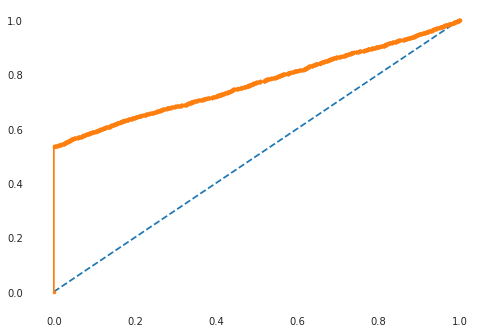

In [0]:
aoc_curve(pystack_model)

In [0]:
pystacknet_cf = metrics.confusion_matrix(y_test, y_preds)

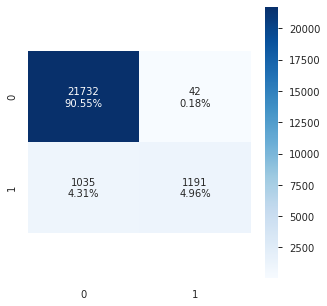

In [0]:
plots_sub(pystacknet_cf)

**KNN classifier**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
print(classification_report(y_test, knn_predict))
print()
print("Accuracy Score: ",metrics.accuracy_score(y_test, knn_predict))
print()

              precision    recall  f1-score   support

           0       0.95      0.82      0.88     21774
           1       0.26      0.62      0.37      2226

    accuracy                           0.80     24000
   macro avg       0.61      0.72      0.62     24000
weighted avg       0.89      0.80      0.84     24000


Accuracy Score:  0.8024166666666667



AUC: 0.766


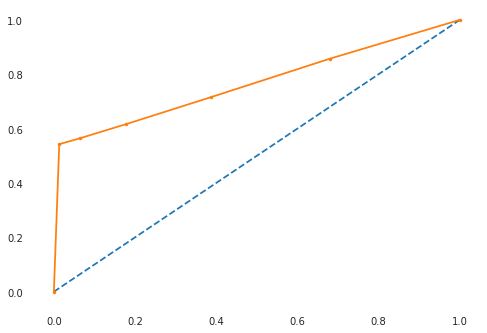

In [0]:
aoc_curve(knn)

In [0]:
knn_matrix = metrics.confusion_matrix(y_test,knn_predict)

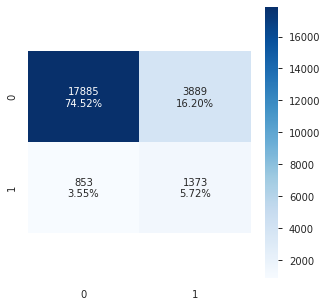

In [0]:
plots_sub(knn_matrix)

**Naive Bayes**

In [0]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train,y_train)

#Predict Output
gnb_prediction = gnb.predict(X_test) # 0:Overcast, 2:Mild
print(classification_report(y_test, gnb_prediction))
print()
print("Accuracy Score: ",metrics.accuracy_score(y_test, gnb_prediction))
print()

              precision    recall  f1-score   support

           0       0.95      0.66      0.78     21774
           1       0.17      0.69      0.28      2226

    accuracy                           0.67     24000
   macro avg       0.56      0.68      0.53     24000
weighted avg       0.88      0.67      0.74     24000


Accuracy Score:  0.66625



AUC: 0.763


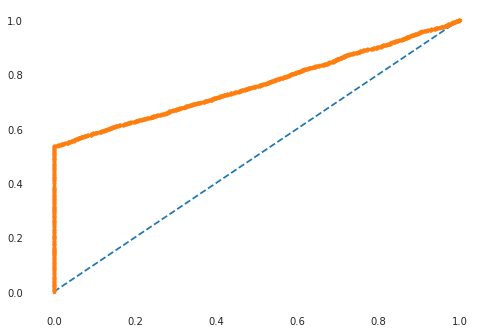

In [0]:
aoc_curve(gnb)

**Neural Nets** - **Autoencoders**

Auto-encoders : Our Autoencoder uses 4 fully connected layers with 14, 7, 7 and 12 neurons respectively. The first two layers are used for our encoder, the last two go for the decoder. Additionally, L1 regularization will be used during training

In [0]:
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

input_dim = X_train.shape[1]

encoding_dim = 14
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer= regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [0]:
nb_epoch = 15
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history1 = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_split = 0.2,
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Train on 139137 samples, validate on 34785 samples
Epoch 1/15
139137/139137 [==============================] - 20s 144us/step - loss: 2398677872658.9878 - accuracy: 0.7839 - val_loss: 1420425648643.5767 - val_accuracy: 0.4692
Epoch 2/15
139137/139137 [==============================] - 20s 144us/step - loss: 2398653873148.4746 - accuracy: 0.8283 - val_loss: 1420411470108.4885 - val_accuracy: 0.7560
Epoch 3/15
139137/139137 [==============================] - 20s 142us/step - loss: 2398629970946.4658 - accuracy: 0.9013 - val_loss: 1420397435716.8040 - val_accuracy: 0.7808
Epoch 4/15
139137/139137 [==============================] - 20s 147us/step - loss: 2398606107531.6514 - accuracy: 0.9381 - val_loss: 1420383270234.2788 - val_accuracy: 0.8762
Epoch 5/15
139137/139137 [==============================] - 20s 144us/step - loss: 2398582218392.0835 - accuracy: 0.9546 - val_loss: 1420369238619.6550 - val_accuracy: 0.8728
Epoch 6/15
139137/139137 [==============================] - 20s 142us/step

In [0]:
  autoencoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 12)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 14)                182       
_________________________________________________________________
dense_63 (Dense)             (None, 7)                 105       
_________________________________________________________________
dense_64 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_65 (Dense)             (None, 12)                96        
Total params: 439
Trainable params: 439
Non-trainable params: 0
_________________________________________________________________


Summary for the autoencoder model. That's a cool new autonecoder. 

In [0]:
history1

{'accuracy': [0.85218084,
  0.86077666,
  0.8742252,
  0.98490125,
  0.9951128,
  0.9967112,
  0.9963489,
  0.99663067,
  0.9965617,
  0.9963489,
  0.99589473,
  0.99642366,
  0.9960154,
  0.9962282,
  0.9963202],
 'loss': [2203022204194.6284,
  2202994787542.3945,
  2202967434912.128,
  2202940091237.566,
  2202912788170.59,
  2202885421039.067,
  2202858065340.038,
  2202830763965.3276,
  2202803398867.086,
  2202776054713.5947,
  2202748730901.955,
  2202721383527.0938,
  2202694048173.307,
  2202666718337.188,
  2202639358271.655],
 'val_accuracy': [0.9744583368301392,
  0.9746666550636292,
  0.9868749976158142,
  0.9987499713897705,
  0.9986249804496765,
  0.9993749856948853,
  0.9981666803359985,
  0.999833345413208,
  0.9995416402816772,
  0.9992083311080933,
  0.9987916946411133,
  0.9994583129882812,
  0.9992916584014893,
  0.9987916946411133,
  0.9993749856948853],
 'val_loss': [2865684387026.261,
  2865649128658.261,
  2865613585077.5894,
  2865578046739.7974,
  286554254387

In [0]:
autoencoder = load_model('model.h5')

**Evaluation**

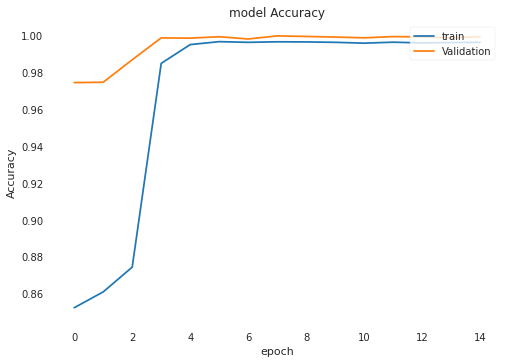

In [0]:
plt.plot(history1['accuracy'])
plt.plot(history1['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper right');

Due to the huge imbalancement of the classes, the trained model is more biased towards the testing data at the initial stage and it gradually rises in the test data.

In [0]:
autoencoder_pred = autoencoder.predict(X_test)

In [0]:
autoencoder_pred

array([[6.4555890e+02, 3.6993393e+01, 6.1651242e-01, ..., 3.7692833e-01,
        2.2975051e-01, 3.9062393e-01],
       [6.4555890e+02, 3.6993393e+01, 6.1651242e-01, ..., 3.7692833e-01,
        2.2975051e-01, 3.9062393e-01],
       [6.4555890e+02, 3.6993393e+01, 6.1651242e-01, ..., 3.7692833e-01,
        2.2975051e-01, 3.9062393e-01],
       ...,
       [6.4555890e+02, 3.6993393e+01, 6.1651242e-01, ..., 3.7692833e-01,
        2.2975051e-01, 3.9062393e-01],
       [6.4555890e+02, 3.6993393e+01, 6.1651242e-01, ..., 3.7692833e-01,
        2.2975051e-01, 3.9062393e-01],
       [6.4555890e+02, 3.6993393e+01, 6.1651242e-01, ..., 3.7692833e-01,
        2.2975051e-01, 3.9062393e-01]], dtype=float32)

In [0]:
mse = np.mean(np.power(X_test - autoencoder_pred, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [0]:
error_df.describe()

,reconstruction_error,true_class
count,2.400000e+04,24000.000000
mean,2.865189e+12,0.092750
std,2.690330e+12,0.290088
min,1.984854e-01,0.000000
25%,4.083626e+11,0.000000
50%,2.047414e+12,0.000000
75%,4.903866e+12,0.000000
max,8.956788e+12,1.000000


**Reconstruction error for fraud**

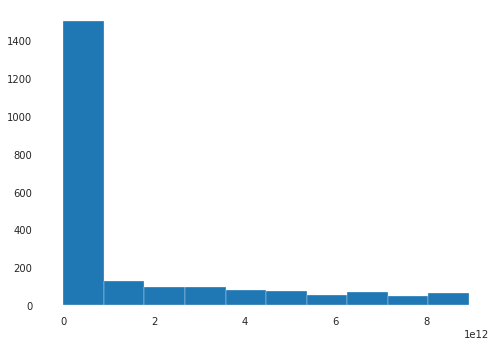

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

In [0]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

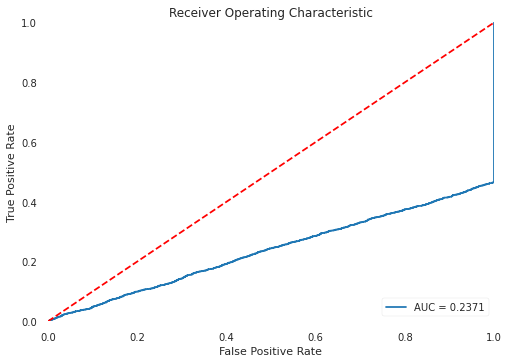

In [0]:
# aoc_curve(autoencoder)
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

AUC is 23% so it is not working as well as you would expect it to.

**Neural Network Model**

In [0]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

nn_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(256, activation='relu'), 
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])


In [0]:
nn_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_46 (Dense)             (None, 256)               3328      
_________________________________________________________________
dense_47 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_48 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_49 (Dense)             (None, 2)                 130       
Total params: 44,766
Trainable params: 44,766
Non-trainable params: 0
_________________________________________________________________


In [0]:
nn_model.compile(Adam(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
nn_model.fit(X_train, y_train, validation_split=0.2, batch_size=500, epochs=50, shuffle=True, verbose=2)

Train on 139137 samples, validate on 34785 samples
Epoch 1/50
 - 1s - loss: 6410.7890 - accuracy: 0.7204 - val_loss: 0.0025 - val_accuracy: 0.9996
Epoch 2/50
 - 1s - loss: 3.9064 - accuracy: 0.8102 - val_loss: 0.7070 - val_accuracy: 0.5308
Epoch 3/50
 - 1s - loss: 3.3721 - accuracy: 0.8234 - val_loss: 0.7041 - val_accuracy: 0.5308
Epoch 4/50
 - 1s - loss: 213.9303 - accuracy: 0.8016 - val_loss: 0.7174 - val_accuracy: 0.5308
Epoch 5/50
 - 1s - loss: 0.4226 - accuracy: 0.8234 - val_loss: 0.7022 - val_accuracy: 0.5308
Epoch 6/50
 - 1s - loss: 6.9767 - accuracy: 0.8201 - val_loss: 0.7126 - val_accuracy: 0.5308
Epoch 7/50
 - 1s - loss: 0.6024 - accuracy: 0.8234 - val_loss: 0.7101 - val_accuracy: 0.5308
Epoch 8/50
 - 1s - loss: 0.4227 - accuracy: 0.8234 - val_loss: 0.7022 - val_accuracy: 0.5308
Epoch 9/50
 - 1s - loss: 0.4226 - accuracy: 0.8234 - val_loss: 0.7132 - val_accuracy: 0.5308
Epoch 10/50
 - 1s - loss: 0.4227 - accuracy: 0.8234 - val_loss: 0.6829 - val_accuracy: 0.5308
Epoch 11/50
 

In [0]:
nn_predictions = nn_model.predict(X_test, batch_size=64, verbose=0)

In [0]:
nn_fraud_predictions = nn_model.predict_classes(X_test, batch_size=200, verbose=0)

In [0]:
print(metrics.accuracy_score(y_test, nn_fraud_predictions))
print(metrics.recall_score(y_test, nn_fraud_predictions))

0.9568333333333333
0.5345911949685535


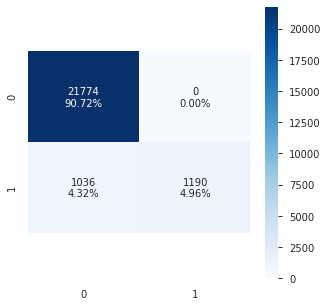

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, nn_fraud_predictions)
plots_sub(cm)

AUC: 0.767


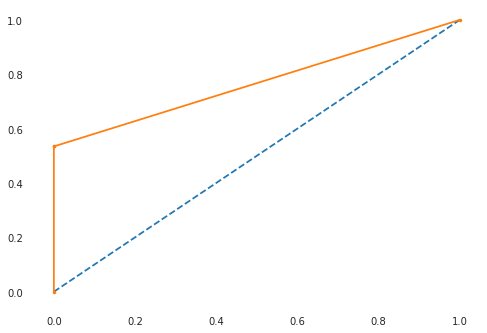

In [0]:
aoc_curve(nn_model)

In [0]:
a